# Exploratory Data Analysis

## Introduction

### Import Libraries

In [49]:
%matplotlib inline

import os

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Load in Datasets

These datasets have already been cleaned and formatted in *DataCleaning.ipynb*.

In [2]:
DIR_PATH = os.path.join(os.getcwd(), "data", "clean_data")

In [3]:
Boosters = pd.read_csv(os.path.join(DIR_PATH, "Boosters.csv"))
Cards = pd.read_csv(os.path.join(DIR_PATH, "Cards.csv"))
CardsColorIdentity = pd.read_csv(os.path.join(DIR_PATH, "CardsColorIdentity.csv"))
CardsCost = pd.read_csv(os.path.join(DIR_PATH, "CardsCost.csv"))
CardsLegality = pd.read_csv(os.path.join(DIR_PATH, "CardsLegality.csv"))
CardsPrintings = pd.read_csv(os.path.join(DIR_PATH, "CardsPrintings.csv"))
CardsSubtypes = pd.read_csv(os.path.join(DIR_PATH, "CardsSubtypes.csv"))
CardsSupertypes = pd.read_csv(os.path.join(DIR_PATH, "CardsSupertypes.csv"))
CardsTypes = pd.read_csv(os.path.join(DIR_PATH, "CardsTypes.csv"))
Sets = pd.read_csv(os.path.join(DIR_PATH, "Sets.csv"))

In [4]:
Tables = [Boosters, Sets, CardsPrintings, Cards, CardsLegality, CardsCost, CardsColorIdentity, CardsSubtypes, CardsSupertypes, CardsTypes]

## Analysis

### Card Type Count

There are 37161 unique *Creature* cards printed, and then a similar number of *Sorcery*, *Instant*, *Artifact*, and *Enchantment* cards. *Planeswalker* cards were introduced into magic and held higher rarity type than most other cards by percentage of prints. However, this amount is still surprising. The other card types were available during certain sets, blocks, or theme which a block or set might return to. As a result, less of them were printed.

In [5]:
CardsTypes.loc[:,~CardsTypes.columns.isin(['name'])].sum().sort_values(ascending=False)

Creature        37161
Sorcery          8518
Instant          8480
Land             8413
Artifact         8271
Enchantment      7702
Planeswalker     1315
Tribal            122
Battle             52
Stickers           48
Conspiracy         26
dtype: int64

### Card Type Rarity Distribution

In [69]:
card_type_rarity = CardsTypes.join(CardsPrintings[['name','rarity']].set_index('name'), on='name', how="inner").drop('name', axis=1)  # Join Printings (for rarity) and Types
card_type_rarity = card_type_rarity.groupby('rarity').sum()  # Get count of each "type" for each "rarity"
card_type_rarity = card_type_rarity.sort_values('Instant', ascending=False)  # Order "rarity" by "Instant" cards to maintain correct ordering

In [70]:
# Total printings for each rarity, sorted
card_type_rarity.sort_index(key=card_type_rarity.sum(1).get, ascending=False).sum(1)

rarity
Common      2540517
Rare         305845
Uncommon     123661
Mythic        35955
Special        1896
Bonus            54
dtype: int64

It is interesting to see that there are more "Rare" printings of cards than "Uncommon" printings, especially considering I had always assumed that there were more guaranteed "Uncommon" cards in boosters than "Rare", which usually shares a space with "Mythic Rare". This will be explored later on.

In [65]:
card_type_rarity

,Artifact,Battle,Conspiracy,Creature,Enchantment,Instant,Land,Planeswalker,Sorcery,Stickers,Tribal
rarity,,,,,,,,,,,
Common,10094,0,10,47923,11189,30264,2423006,0,17816,48,167
Uncommon,20630,20,11,45767,11253,16676,13760,1166,14248,0,130
Rare,22456,44,5,70519,15002,14616,161616,1176,20312,0,99
Mythic,4835,20,2,18701,1926,1193,1486,5685,2047,0,60
Special,200,0,0,1006,121,250,103,0,216,0,0
Bonus,36,0,0,0,0,6,0,0,12,0,0


There are far too many "Common" rarity lands to properly display on a chart, with there being more than twice the number of "Common Land" (2423006) cards than all other "Common" type printings combined (117511). This is likely the result of basic land printings.

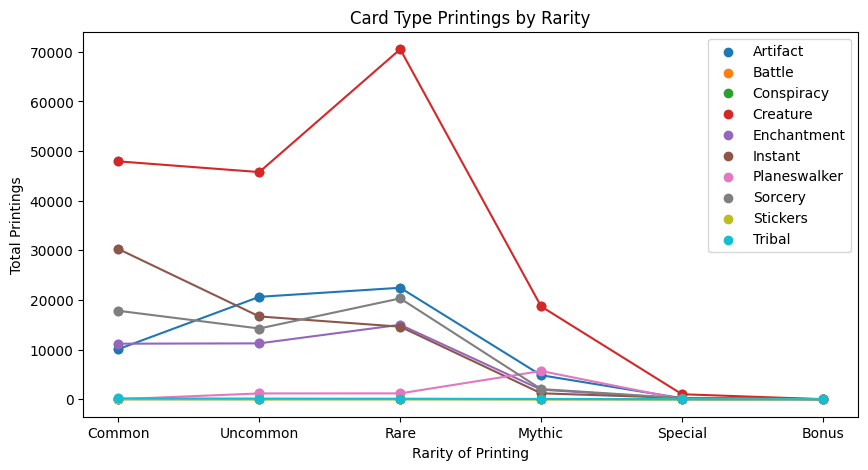

In [78]:
fig = plt.figure(figsize=(10, 5))

rarities = list(card_type_rarity.index)
card_types = list(card_type_rarity.columns)
card_types.remove('Land')



for i in range(0,len(card_types)):
    plt.scatter(x=card_type_rarity.index, y=card_type_rarity[[card_types[i]]], label=card_types[i])
    plt.plot(card_type_rarity[[card_types[i]]], marker="o")

plt.title("Card Type Printings by Rarity")
plt.xlabel("Rarity of Printing")
plt.ylabel("Total Printings")
plt.legend()
plt.show()